In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [354]:
def tensor_process(mu0_H, omega, magnetisation = 1.001, gamma = 28.8, eta = 0.0001):

    omega_m = gamma * magnetisation

    omega_0 = gamma * np.sqrt((mu0_H**2 + np.abs(mu0_H * magnetisation))) + 1j * eta * omega

    Uxx = (omega_m * omega_0) / (omega_0**2 - omega**2)

    return Uxx

In [355]:
field = np.linspace(-0.3, 0.3, 160)
omega_array = np.linspace(0, 15, 5001)

fields, omegas = np.meshgrid(field, omega_array)

tensor_matrix = tensor_process(fields, omegas)

In [356]:
import FMR_Analysis

file_path = {
    'sample': 'sample 1 1-15GHz -4 to 4A (1).h5',
}

x,y,z = FMR_Analysis.functionality(
    *file_path.values(),
    vmin = -2.5,
    vmax = 0.7,
    plot_name = 'hello',
    background_removal= False
)

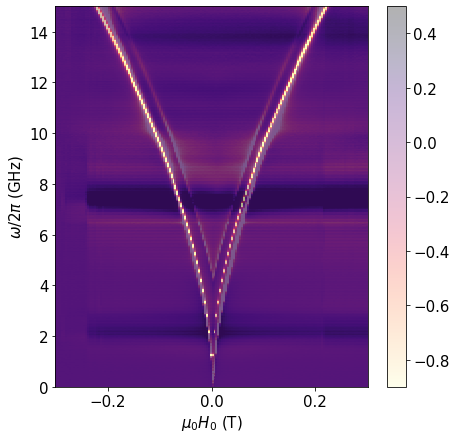

In [357]:
fig = plt.figure(figsize=(7,7))
plt.pcolormesh(fields, omegas, np.imag(tensor_matrix), cmap = 'magma_r', vmin=-2.5, vmax=0.7, alpha = 1)
plt.pcolormesh(fields, omegas, z,  cmap = 'magma_r', vmin = -0.9, vmax = 0.5, alpha = 0.3)
plt.colorbar()
plt.rcParams['font.size'] = 15
plt.xlabel('$\mu_0H_0$ (T)')
plt.ylabel('$\omega/2\pi$ (GHz)')
plt.show()